In [1]:
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal, special
import matplotlib.pyplot as plt
import connectivipy as cp
import scipy.stats as st 
import networkx as nx
import pandas as pd
import numpy as np
import pyedflib

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [758]:
#read all data

# Eyes open
E0=pyedflib.EdfReader("S064R01.edf")

#eyes closed 
E1=pyedflib.EdfReader("S064R02.edf")

locations=pd.read_csv("channel_locations.csv" )
x_lc = locations.x.values
y_lc = locations.y.values
pos = list(zip(x_lc,y_lc))

In [4]:
signal_labels = E0.getSignalLabels()
#unit of signal microvolts
E1.getPhysicalDimension(61)

'uV'

In [5]:
def build_feature_space(edf_file):
    n = edf_file.signals_in_file
    feature_mat = np.zeros((edf_file.getNSamples()[0] , n))
    for i in range(n):
        feature_mat[:, i] = edf_file.readSignal(i)
    return feature_mat

signals_1 = build_feature_space(E0) #Eyes open state
signals_2 = build_feature_space(E1) #eyes closed state

In [6]:
signals_1[:,-1]

array([-46., -44., -44., ...,   0.,   0.,   0.])

In [7]:
# sampling frequency , time interval 
Fs = 160
t0 = 0
tf = int(E0.getNSamples()[0] / Fs)
t = np.arange(t0, tf, 1. / Fs)


### 1.1 Select relevant channel and estimate Power Spectral Density (PSD) using one of the methods introduced during the course. Justify your choice of channel selection and parameters used for PSD estimation

In [8]:
# relevant channels because they make the occipetal lobe which is related to the visual processing
channel_names = ['O1..','Oz..','O2..']
channel_indeices = [signal_labels.index(ch) for ch in channel_names]
channel_indeices

[60, 61, 62]

### Eyes open state

In [1347]:
from scipy.signal import welch

f, psd = welch(signals_1[:,60],
               fs=Fs,  # sample rate
               window='hanning',   # apply a Hanning window before taking the DFT
               nperseg=256,        # compute periodograms of 256-long segments of x
               detrend='constant') # detrend your signal


f1, psd1 = welch(signals_1[:,61],
               fs=Fs,  # sample rate
               window='hanning',   # apply a Hanning window before taking the DFT
               nperseg=256,        # compute periodograms of 256-long segments of x
               detrend='constant') # detrend your signal


f2, psd2 = welch(signals_1[:,62],
               fs=Fs,  # sample rate
               window='hanning',   # apply a Hanning window before taking the DFT
               nperseg=256,        # compute periodograms of 256-long segments of x
               detrend='constant') # detrend your signal

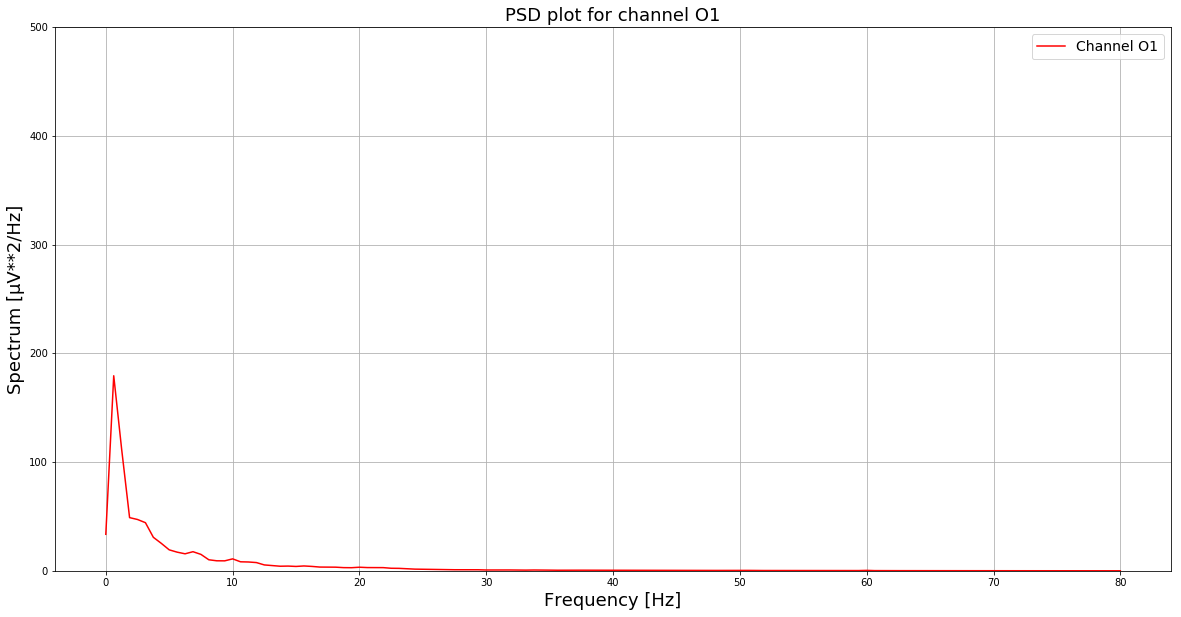

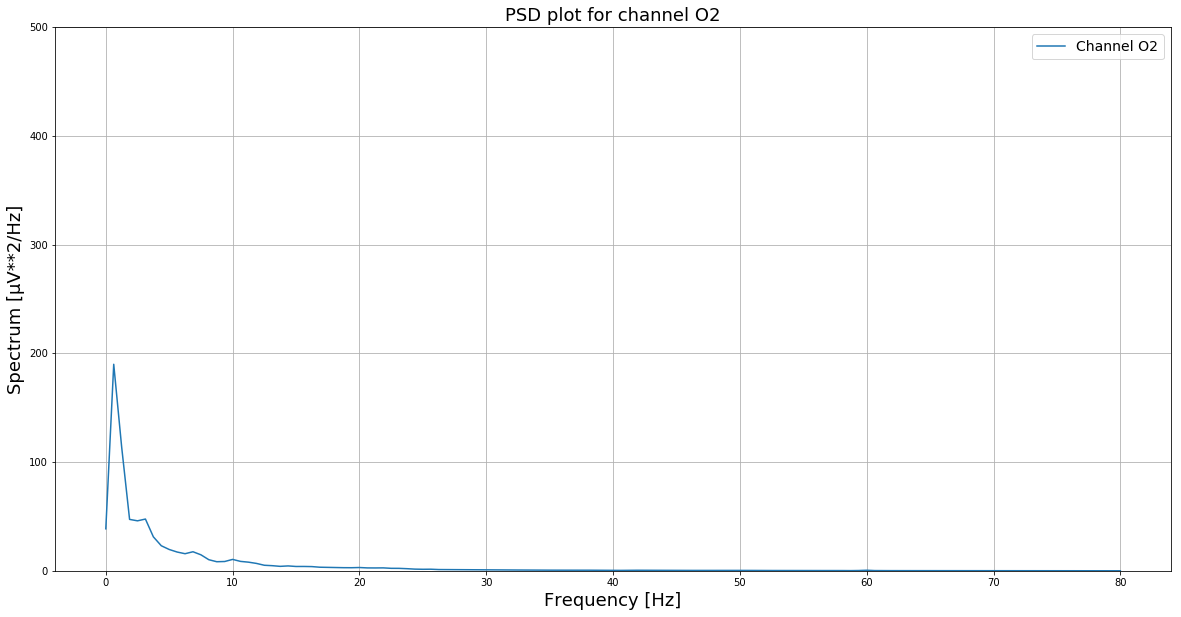

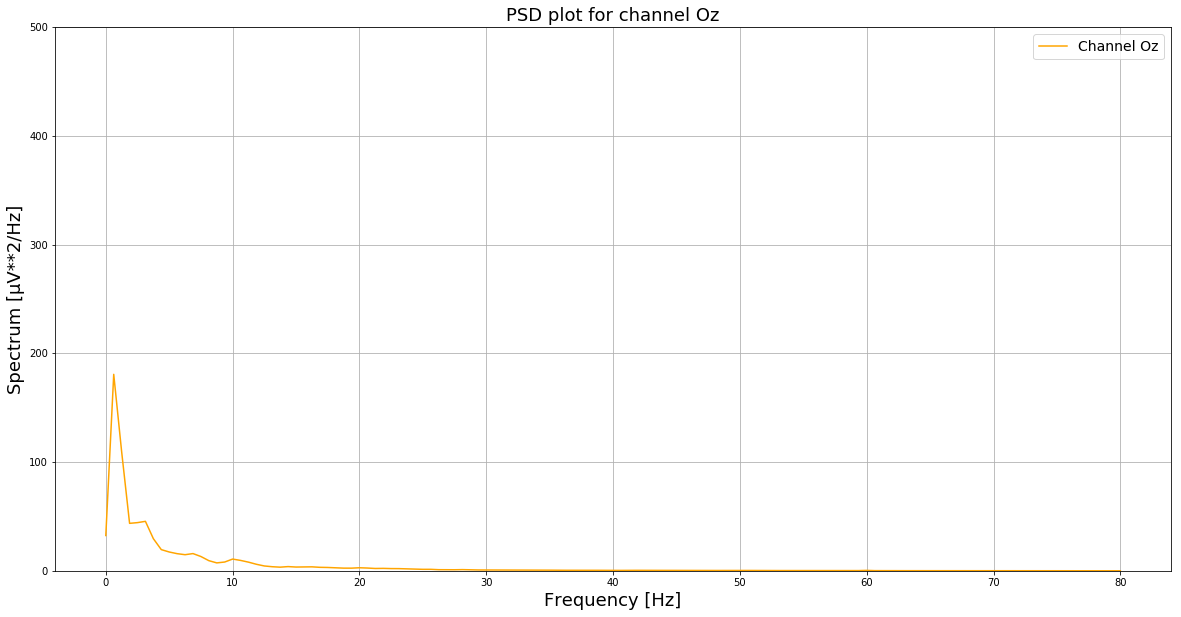

In [1345]:
#Channel O1
plt.figure(figsize=(20,10))
plt.plot(f, psd , c = 'red')
plt.xlabel('Frequency [Hz]', fontsize=18)
plt.ylabel('Spectrum [µV**2/Hz]', fontsize=18)
#plt.xlim(0,20)
plt.ylim([0.5e-3, 500])
plt.legend(['Channel O1'] , fontsize = 14)
plt.title('PSD plot for channel O1' , fontsize = 18)
plt.grid()
plt.show()

#Channel O2
plt.figure(figsize=(20,10))
plt.plot(f1, psd1)
plt.xlabel('Frequency [Hz]', fontsize=18)
plt.ylabel('Spectrum [µV**2/Hz]', fontsize=18)
#plt.xlim(0,20)
plt.ylim([0.5e-3, 500])
plt.legend(['Channel O2'] , fontsize = 14)
plt.title('PSD plot for channel O2' , fontsize = 18)
plt.grid()
plt.show()

# Channel Oz
plt.figure(figsize=(20,10))
plt.plot(f2, psd2 , c = 'orange')
plt.xlabel('Frequency [Hz]', fontsize=18)
plt.ylabel('Spectrum [µV**2/Hz]', fontsize=18)
#plt.xlim(0,20)
plt.ylim([0.5e-3, 500])
plt.legend(['Channel Oz'] , fontsize = 14)
plt.title('PSD plot for channel Oz' , fontsize = 18)
plt.grid()
plt.show()

### Eyes Closed state

In [1356]:
from scipy.signal import welch

f, psd = welch(signals_2[:,60],
               fs=Fs,  # sample rate
               window='hanning',   # apply a Hanning window before taking the DFT
               nperseg=256,        # compute periodograms of 256-long segments of x
               detrend='constant') # detrend your signal


f1, psd1 = welch(signals_2[:,61],
               fs=Fs,  # sample rate
               window='hanning',   # apply a Hanning window before taking the DFT
               nperseg=256,        # compute periodograms of 256-long segments of x
               detrend='constant') # detrend your signal


f2, psd2 = welch(signals_2[:,62],
               fs=Fs,  # sample rate
               window='hanning',   # apply a Hanning window before taking the DFT
               nperseg=256,        # compute periodograms of 256-long segments of x
               detrend='constant') # detrend your signal

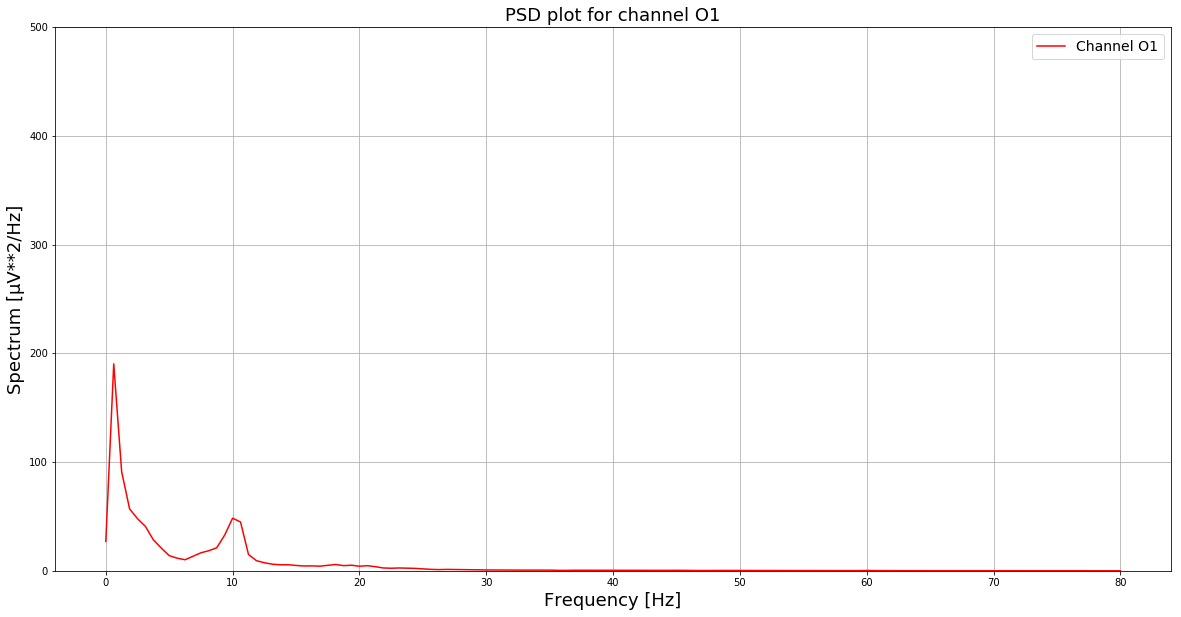

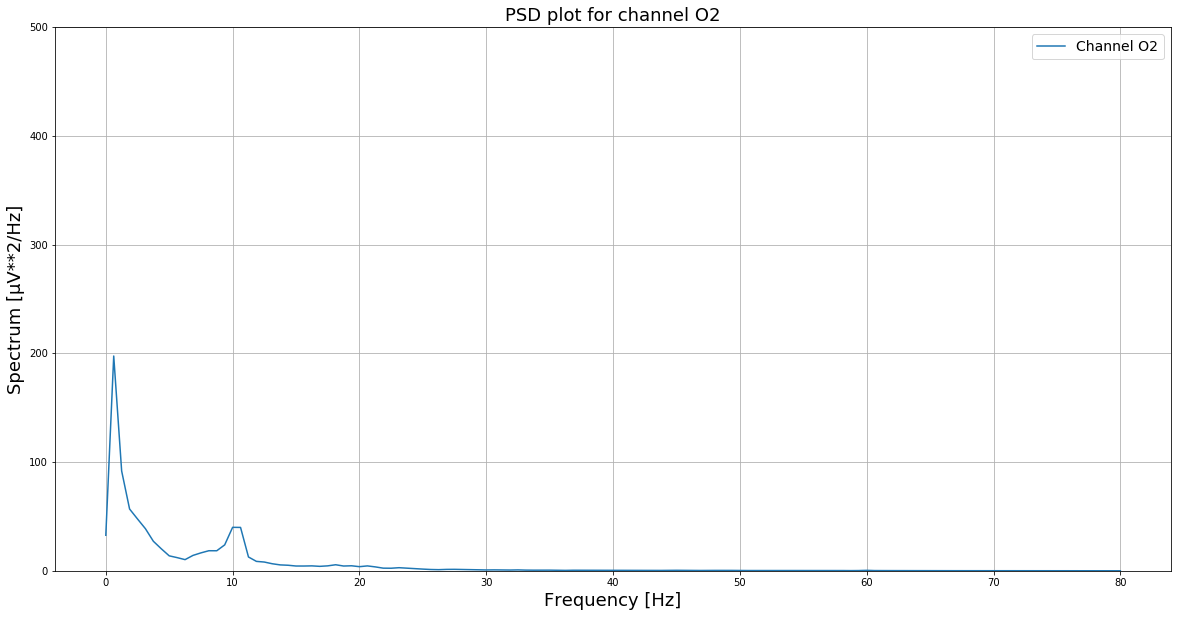

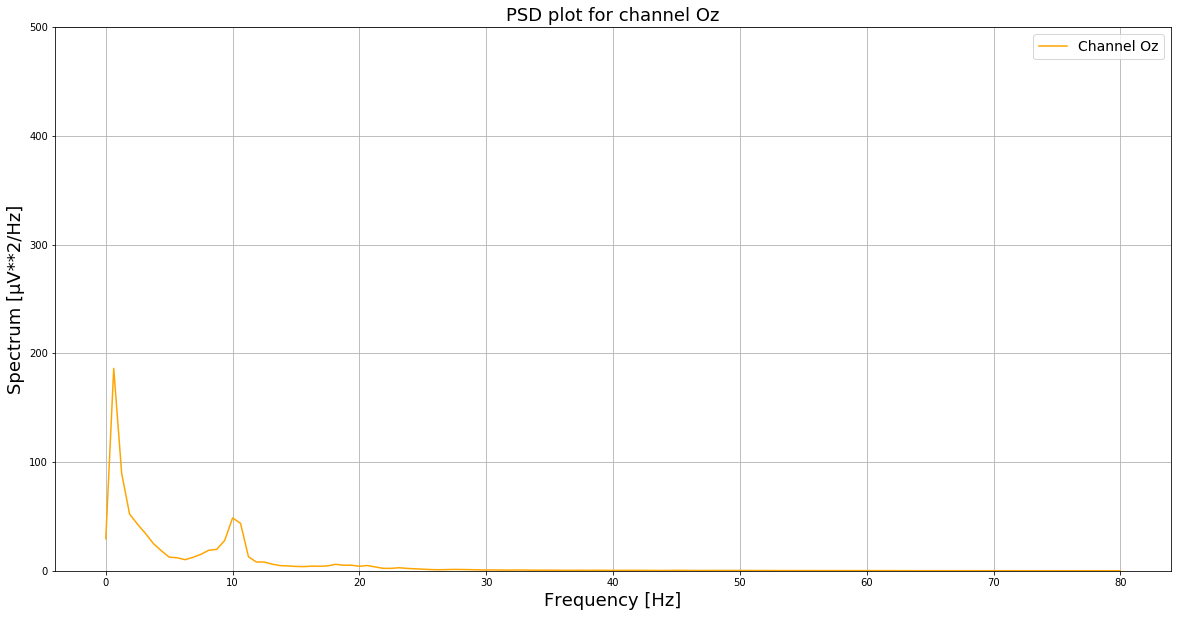

In [1357]:
#Channel O1
plt.figure(figsize=(20,10))
plt.plot(f, psd , c = 'red')
plt.xlabel('Frequency [Hz]', fontsize=18)
plt.ylabel('Spectrum [µV**2/Hz]', fontsize=18)
#plt.xlim(0,20)
plt.ylim([0.5e-3, 500])
plt.legend(['Channel O1'] , fontsize = 14)
plt.title('PSD plot for channel O1' , fontsize = 18)
plt.grid()
plt.show()

#Channel O2
plt.figure(figsize=(20,10))
plt.plot(f1, psd1)
plt.xlabel('Frequency [Hz]', fontsize=18)
plt.ylabel('Spectrum [µV**2/Hz]', fontsize=18)
#plt.xlim(0,20)
plt.ylim([0.5e-3, 500])
plt.legend(['Channel O2'] , fontsize = 14)
plt.title('PSD plot for channel O2' , fontsize = 18)
plt.grid()
plt.show()

# Channel Oz
plt.figure(figsize=(20,10))
plt.plot(f2, psd2 , c = 'orange')
plt.xlabel('Frequency [Hz]', fontsize=18)
plt.ylabel('Spectrum [µV**2/Hz]', fontsize=18)
#plt.xlim(0,20)
plt.ylim([0.5e-3, 500])
plt.legend(['Channel Oz'] , fontsize = 14)
plt.title('PSD plot for channel Oz' , fontsize = 18)
plt.grid()
plt.show()

### 1.3 Compare different choices of estimation parameters

In [1361]:
n_fft=[512,1000,2000,5000,10000] # hyperparameter for DFT calculation

len_of_segment = [int(128*i) for i in range(1,5)] #nperseg length of each segment
overlap=[nper//2 for nper in len_of_segment] +[nper//3 for nper in len_of_segment] 
win_names = ['blackman', 'hamming', 'flattop']
overlap

[64, 128, 192, 256, 42, 85, 128, 170]

In [307]:
save_dct1 = {}
save_dct2 = {}
config = 0
for n in n_fft:
    for nm in win_names:
        for ln_sgment in len_of_segment:
            overlap = [ln_sgment//2 , ln_sgment//3]
            for o in overlap:
                f_w_eo, psd_w_eo = signal.welch(signals_1[:,60], Fs,window=nm,nfft=n, nperseg=ln_sgment, noverlap=o, scaling="density")
                f_w_ec, psd_w_ec = signal.welch(signals_2[:,60], Fs,window=nm,nfft=n, nperseg=ln_sgment, noverlap=o, scaling="density")
                save_dct1[config] = {'state':'eyes_open','nfft':n,'window':nm,'nperseg':ln_sgment,'noverlap':o,
                                     'freq':f_w_eo,'psd':psd_w_eo}
                save_dct2[config] = {'state':'eyes_closed','nfft':n,'window':nm,'nperseg':ln_sgment,'noverlap':o,
                                     'freq':f_w_ec,'psd':psd_w_ec}
                
                config+= 1


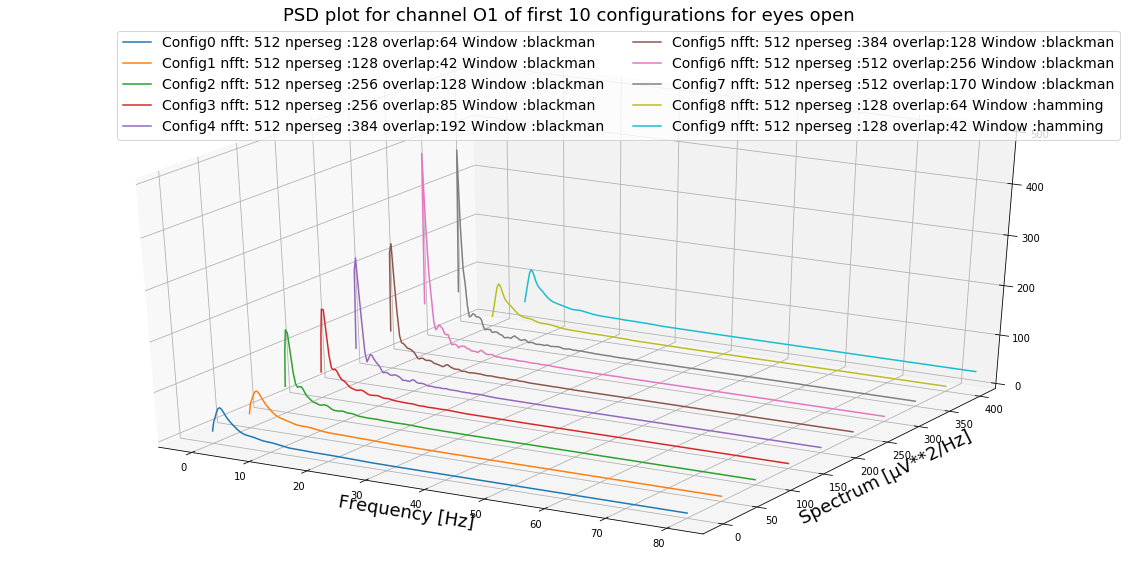

In [1362]:
# Plot of first 10 configurations of PSD for Eyes open for channel O1 
def plot_config(dct):

    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111, projection='3d')

    for i in range(10):
        freq = dct[i]['freq']
        psd = dct[i]['psd']

        # For channel O1 
        ax.plot(freq, psd,i*50, zdir='y')
        
    ax.set_zlim3d(0, 500)                    # viewrange for z-axis should be [-4,4] 

    plt.xlabel('Frequency [Hz]', fontsize=18)
    plt.ylabel('Spectrum [µV**2/Hz]', fontsize=18)
    

plot_config(save_dct1)
plt.legend(['Config'+str(i)+' nfft: '+ str(save_dct1[i]['nfft'])+' nperseg :'
            + str(save_dct1[i]['nperseg']) +' overlap:'+ str(save_dct1[i]['noverlap']) + ' Window :' + save_dct1[i]['window'] for i in range(10) ], fontsize = 14,ncol = 2)

plt.title('PSD plot for channel O1 of first 10 configurations for eyes open' , fontsize = 18 , y = 1.08)
plt.grid()
plt.savefig('fig_2_eo_many_config.png')
plt.show()
        

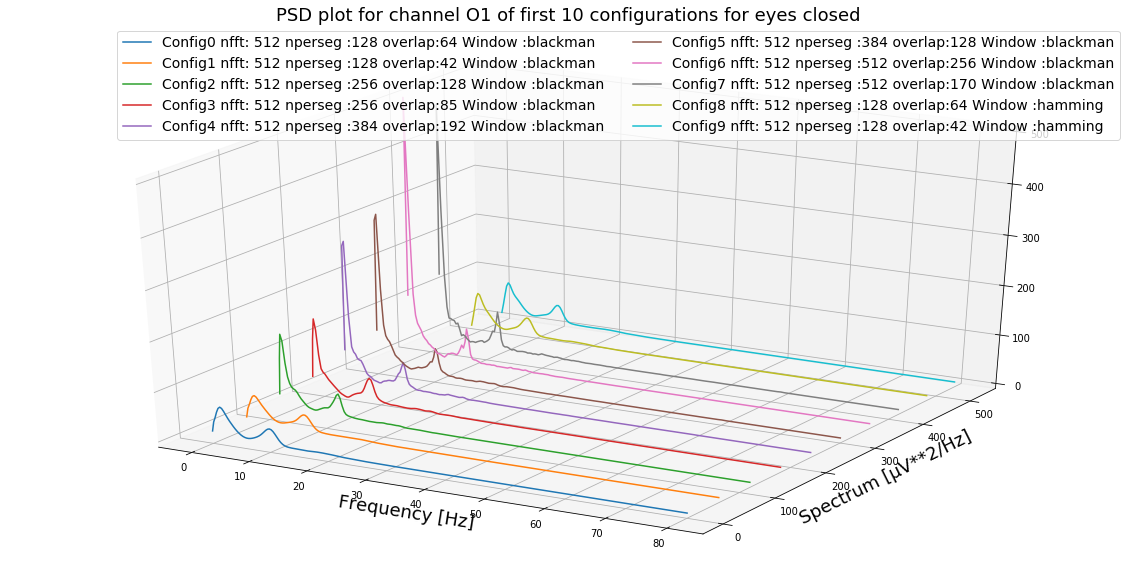

In [1363]:
# Plot of first 10 configurations of PSD for Eyes closed for channel O1 
def plot_config(dct):

    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111, projection='3d')

    for i in range(10):
        freq = dct[i]['freq']
        psd = dct[i]['psd']

        # For channel O1 
        ax.plot(freq, psd,i*60, zdir='y')
        
    ax.set_zlim3d(0, 500)                    # viewrange for z-axis should be [-4,4] 

    plt.xlabel('Frequency [Hz]', fontsize=18)
    plt.ylabel('Spectrum [µV**2/Hz]', fontsize=18)
    

plot_config(save_dct2)
plt.legend(['Config'+str(i)+' nfft: '+ str(save_dct2[i]['nfft'])+' nperseg :'
            + str(save_dct2[i]['nperseg']) +' overlap:'+ str(save_dct2[i]['noverlap']) + ' Window :' + save_dct2[i]['window'] for i in range(10) ], fontsize = 14,ncol = 2)

plt.title('PSD plot for channel O1 of first 10 configurations for eyes closed' , fontsize = 18 , y = 1.08)
plt.grid()
plt.savefig('fig_1.3_ec_many_config.png')
plt.show()
        

### 1.4 Make a multivariate comparison of PSDs, considering simultaneously two independent variables (channels resting state)

### Principal Component Analysis to determine which channels are important

In [1364]:


import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)  # number of pca compnonents kept are 3 
pca2 = PCA(n_components = 3) # for eyes closed
fit =pca.fit(signals_1)      # for eyes open
fit2 = pca2.fit(signals_2)   # for eyes closed

i = np.identity(len(signal_labels))
coef = abs(pca.transform(i))
coef2 = abs(pca2.transform(i))

In [1367]:
df_eyesopen = pd.DataFrame(coef,index=signal_labels,columns=['PCA1','PCA2','PCA3']) # contribution of channels to all 3 principal compnents for eyes open

df_eyesclosed = pd.DataFrame(coef2,index=signal_labels,columns=['PCA1','PCA2','PCA3'])# contribution of channels to all 3 principal compnents for eyes closed

print('Variable Importance for Eyes Open','\n')
print(df_eyesopen.tail())
print('\n')
print('Variable Importance for Eyes Closed','\n')
print(df_eyesclosed.tail())

Variable Importance for Eyes Open 

            PCA1       PCA2       PCA3
Po8.  134.039307  70.126839  11.433230
O1..  134.045450  70.107750  11.493594
Oz..  134.044922  70.113401  11.477477
O2..  134.042660  70.111585  11.453044
Iz..  134.026040  70.126709  11.495579


Variable Importance for Eyes Closed 

           PCA1       PCA2      PCA3
Po8.  20.641912  10.427421  8.334263
O1..  20.645442  10.424099  8.283701
Oz..  20.646813  10.428414  8.300129
O2..  20.642530  10.408385  8.318402
Iz..  20.626269  10.457613  8.251803


### Plots for PSD considering both states eyes open and eyes closed for channels O1 and O2

In [1381]:
f_w_eo, psd_w_eo = signal.welch(signals_1, Fs, nfft=2000, nperseg=256, noverlap=256//2, scaling="density", axis=0)
f_w_ec, psd_w_ec = signal.welch(signals_2, Fs, nfft=2000, nperseg=256, noverlap=256//2, scaling="density", axis=0)


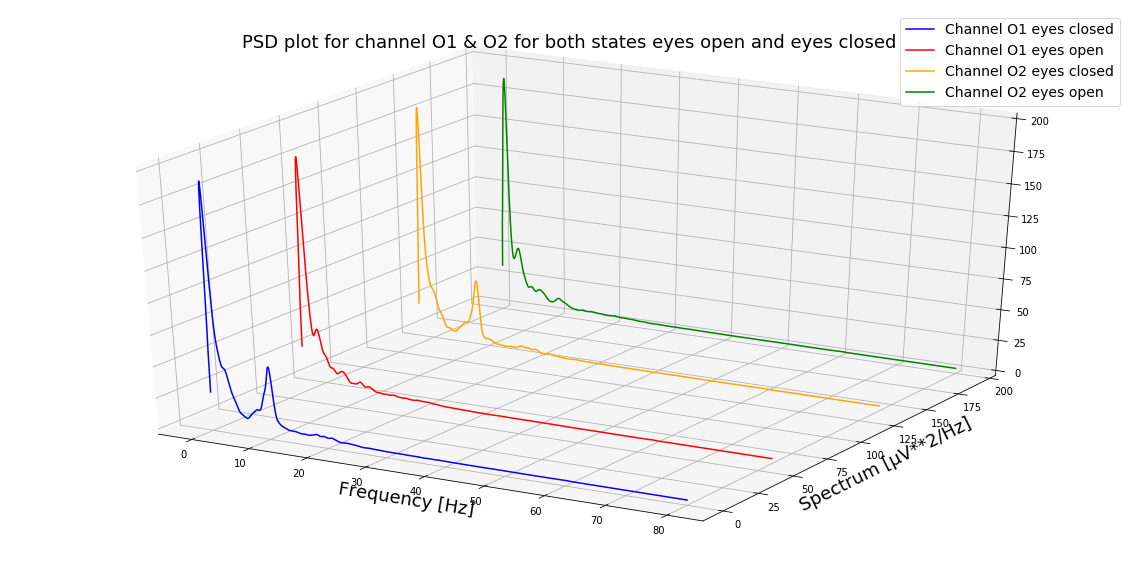

In [1382]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')

# For channel O1 
ax.plot(f_w_ec, psd_w_ec[:,60],0, zdir='y', c="blue")
ax.plot(f_w_ec, psd_w_eo[:,60],60, zdir='y', c="red")
ax.plot(f_w_ec, psd_w_ec[:,62],140, zdir='y', c="orange")
ax.plot(f_w_ec, psd_w_eo[:,62],200, zdir='y', c="green")

ax.set_zlim3d(0, 200)                    # viewrange for z-axis should be [-4,4] 

plt.xlabel('Frequency [Hz]', fontsize=18)
plt.ylabel('Spectrum [µV**2/Hz]', fontsize=18)
plt.legend(['Channel O1 eyes closed','Channel O1 eyes open','Channel O2 eyes closed','Channel O2 eyes open'] , fontsize = 14)
plt.title('PSD plot for channel O1 & O2 for both states eyes open and eyes closed' , fontsize = 18)
plt.grid()
plt.savefig('fig_16_1.4.png')
plt.show()



### 1.5 Assign a statistical significance value to the differences in PSDs between the two rest conditions.

### Bootstraped Confidence Intervals for channel O1 

In [488]:
x_eo = psd_w_eo[:,60]
x_ec = psd_w_ec[:,60]
diff = x_eo - x_ec
def bootstrap(diff, num_samples = 1000):
    tboot_vec = [] #mean
    std_vec = []  #standard deviation
    for i in range(num_samples):
        sample = np.random.choice(diff,size=len(diff))
        tboot_vec.append(np.mean(sample)) #point estimate 1
        
    return tboot_vec
    
boot_samples = bootstrap(diff)

In [489]:
std_error_boot = np.std(boot_samples) #bootstrap error of point estimate 1
normal_ci = [np.mean(diff) - 2 * std_error_boot , np.mean(diff) + 2 * std_error_boot] #normal confidence interval
percentile_ci = np.percentile(boot_samples , [2.5,97.5])   #percentile confidence interval
print(normal_ci,percentile_ci)

[-1.2056324910723468, -0.51609055061930664] [-1.19171559 -0.54265868]


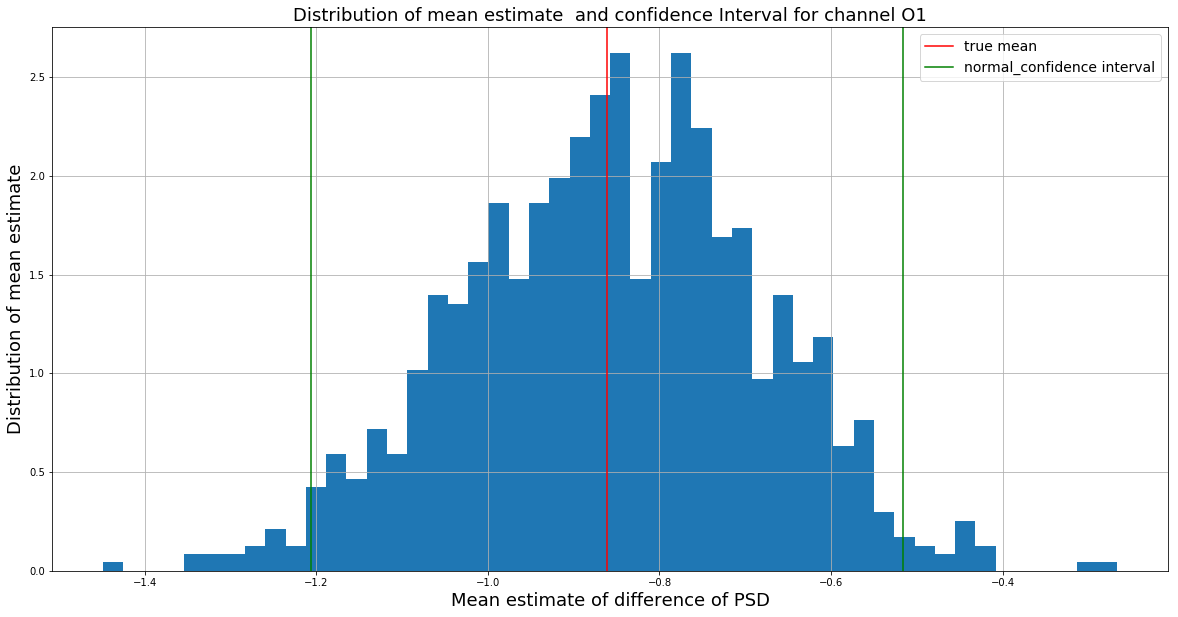

In [1368]:
fig = plt.figure(figsize=(20,10))


plt.hist(boot_samples,bins = 50 , density=True)
plt.axvline(x=np.mean(diff),color = 'red')
plt.axvline(x=normal_ci[0] , color = 'green')
plt.axvline(x=normal_ci[1] , color = 'green')

plt.xlabel('Mean estimate of difference of PSD', fontsize=18)
plt.ylabel('Distribution of mean estimate', fontsize=18)
plt.legend(['true mean','normal_confidence interval'] , fontsize = 14)
plt.title('Distribution of mean estimate  and confidence Interval for channel O1' , fontsize = 18)


plt.grid()
plt.savefig('fig_4_ci.png')
plt.show()

### Empirical P value 

In [491]:
idx = np.argwhere(abs(np.array(boot_samples)) > abs(np.mean(diff)))
p_value = (np.sum(abs(np.array(boot_samples)[idx])) + 1 )/ len(boot_samples)  # emprical p values ( values to the right of the true mean)
print('P_value for channel O1  ' , p_value)
p_value < 0.05    # if true reject the null hyposthesis , if false accept


P_value for channel O1   0.482862679595


False

### Bootstraped Confidence Intervals for channel O2

In [1376]:
x_eo = psd_w_eo[:,62] #channel number 62 is O2
x_ec = psd_w_ec[:,62]
diff = x_eo - x_ec
print(np.mean(diff))
    
boot_samples = bootstrap(diff)

# Build confidence Intervals

std_error_boot = np.std(boot_samples) #bootstrap error of point estimate 1
normal_ci = [np.mean(diff) - 2 * std_error_boot , np.mean(diff) + 2 * std_error_boot] #normal confidence interval
percentile_ci = np.percentile(boot_samples , [2.5,97.5])   #percentile confidence interval
print(normal_ci,percentile_ci)


-0.835912013456
[-1.1929154735923926, -0.47890855331928189] [-1.20584455 -0.50243983]


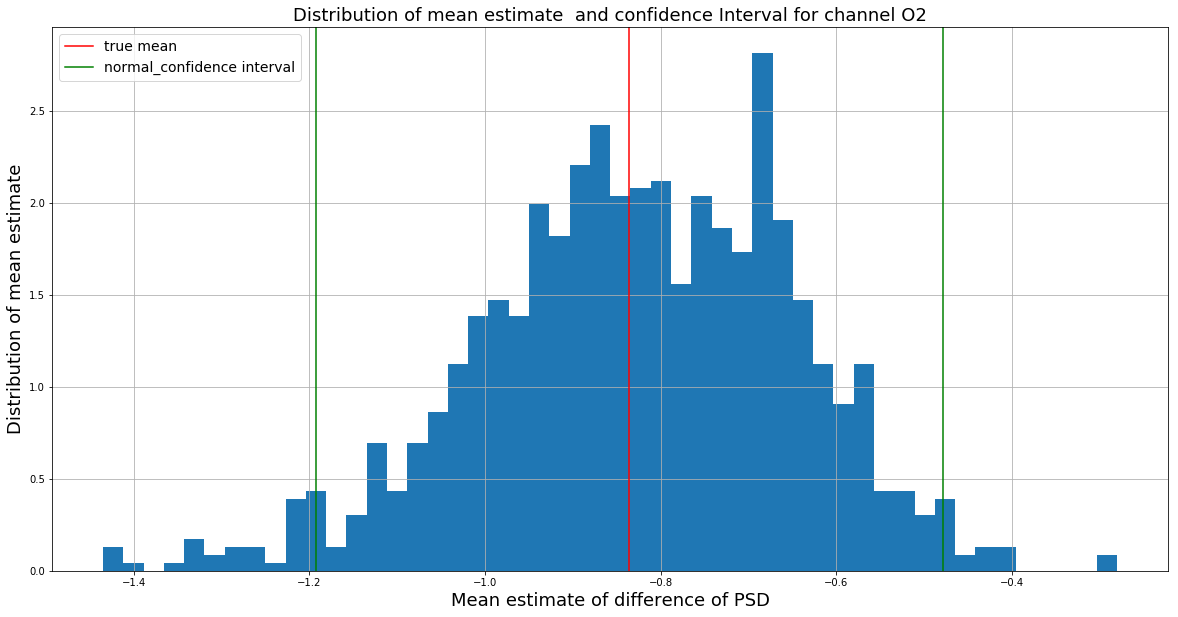

In [1377]:
fig = plt.figure(figsize=(20,10))


plt.hist(boot_samples,bins = 50 , density=True)
plt.axvline(x=np.mean(diff),color = 'red')
plt.axvline(x=normal_ci[0] , color = 'green')
plt.axvline(x=normal_ci[1] , color = 'green')

plt.xlabel('Mean estimate of difference of PSD', fontsize=18)
plt.ylabel('Distribution of mean estimate', fontsize=18)
plt.legend(['true mean','normal_confidence interval'] , fontsize = 14)
plt.title('Distribution of mean estimate  and confidence Interval for channel O2' , fontsize = 18)


plt.grid()
plt.savefig('fig_13_ci.png')
plt.show()

### Empirical P values

In [486]:
idx = np.argwhere(abs(np.array(boot_samples)) > abs(np.mean(diff)))
p_value = (np.sum(abs(np.array(boot_samples)[idx])) + 1 )/ len(boot_samples)  # emprical p values ( values to the right of the true mean)
print('P_value for channel O2  ' , p_value)
p_value < 0.05    # if true reject the null hyposthesis , if false accept


P_value for channel O2   0.503626782233


False

### Connectivity 

### 2.1 Estimate functional brain connectivity among 64 channels using one of the MVAR estimators: Partial Directed Coherence (PDC), Direct Transfer Function (DTF). Select one relevant frequency value. Apply a threshold so that the resulting binary connectivity matrices have network density equal to 20%. Create a graphical representation of the binary adjacency matrix


In [641]:
def get_model_order(signals):
    data = cp.Data(signals, fs=Fs, chan_names=signal_labels, data_info='sml')
    best, crit = cp.Mvar.order_akaike(signals, 20, 'yw')
    return best, crit, data

def cal_dtf(signals):
    opt_order , _ , data = get_model_order(signals)
    data.fit_mvar(opt_order, 'yw')
    ar, vr = data.mvar_coefficients
    dtf = cp.conn.DTF()
    dtf_mat = dtf.calculate(Acoef=ar, Vcoef=vr, fs=Fs , resolution=int(Fs))
    
    return ar,vr,dtf_mat,dtf



In [546]:
#c Choose model order
b_eo,c_eo, _= get_model_order(signals=signals_1.T) #eyes open
b_ec,c_ec, _= get_model_order(signals=signals_2.T) #eyes closed

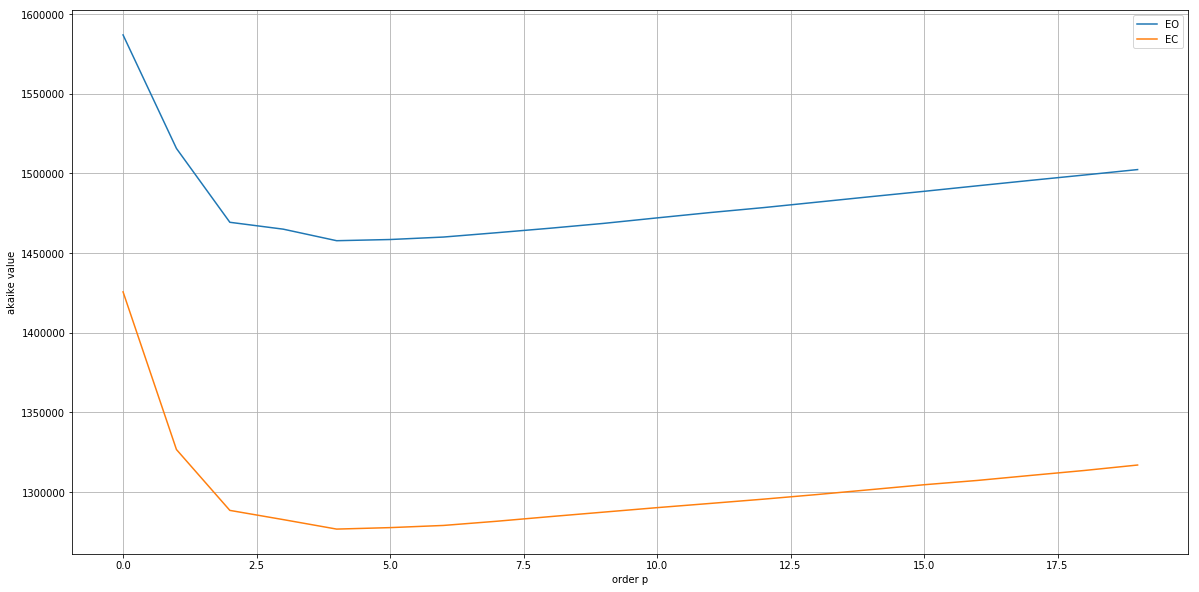

In [682]:
plt.figure(figsize=(20,10))
plt.plot(c_eo)
plt.plot(c_ec)
plt.grid()
plt.ylabel("akaike value")
plt.xlabel("order p")
plt.legend(["EO", "EC"])
plt.savefig("order_AR", format="pdf")
plt.show()

In [698]:
## Calculate DTF
ar_eo,vr_eo,dtf_mat_eo,dtf1 = cal_dtf(signals_1.T) #for eyes open
ar_ec,vr_ec,dtf_mat_ec,dtf2 = cal_dtf(signals_2.T) #for eyes closed

#max psd value occurs around 9th frequency value
dtf_eo = dtf_mat_eo[9]    #dtf for eyes open state
dtf_ec = dtf_mat_ec[9]    #dtf for eyes closed state 


### Plot DTF

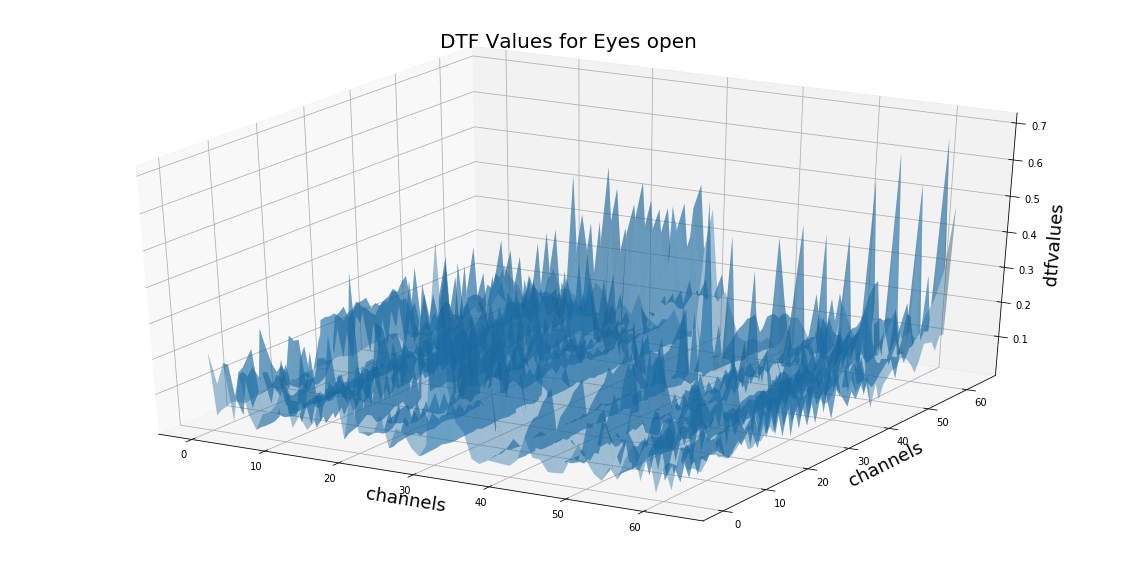

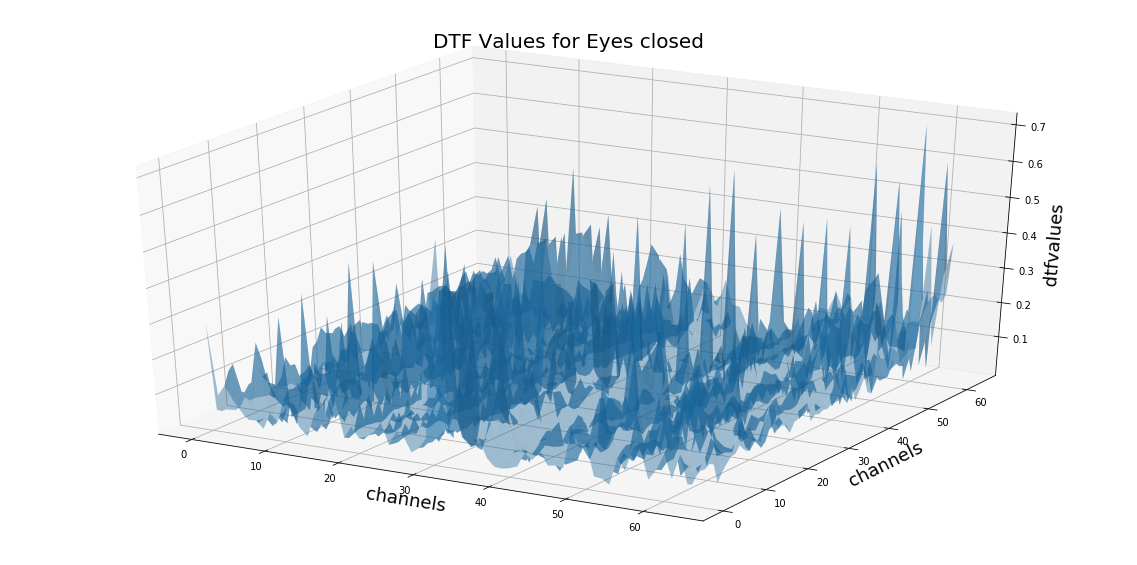

In [1380]:
def plot_dtf(Z, labelx="", labely="", labelz="", name="", flag=False):
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111, projection='3d')
    x = np.arange(0,64,1) #chanels
    xs, ys = np.meshgrid(x, x)
    ax.plot_surface(xs, ys, Z, alpha = 0.4)
    ax.set_xlabel(labelx, fontsize=18)
    ax.set_ylabel(labely, fontsize=18)
    ax.set_zlabel(labelz, fontsize=18)
    ax.set_title(name, fontsize=20)
    #plt.savefig('fig_15_dtf.png')
    plt.show()
    
plot_dtf(dtf_eo,'channels','channels','dtfvalues','DTF Values for Eyes open')
plot_dtf(dtf_ec,'channels','channels','dtfvalues','DTF Values for Eyes closed')

### Thresholding the DTF 

In [728]:
#create directed graph
def threshold(th , dtf_matrix):
    
    dtf_tmp = np.copy(dtf_matrix)
    dtf_tmp[dtf_tmp < th] = 0 #thresholding
    g = nx.DiGraph(dtf_tmp)
    return dtf_tmp,g

dtf_th_eo,g_eo = threshold(0.135,dtf_eo)
dtf_th_ec,g_ec = threshold(0.125,dtf_ec)

print('Density of Eyes open',nx.density(g_eo))
print('Density of Eyes closed',nx.density(g_ec))

Density of Eyes open 0.20188492063492064
Density of Eyes closed 0.2041170634920635


### Plot thresholded graphs

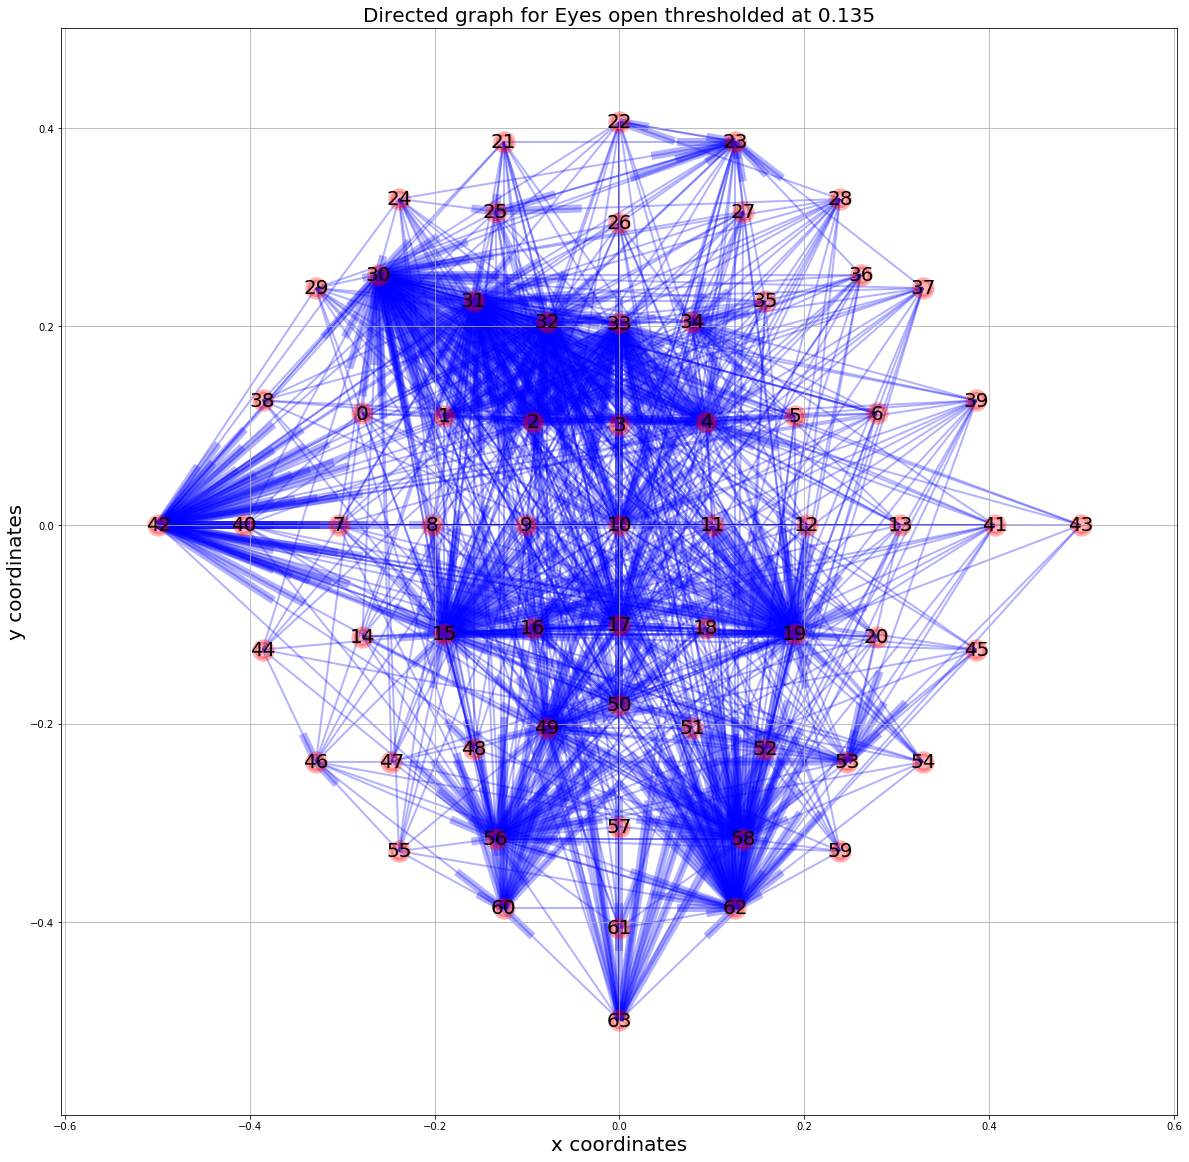

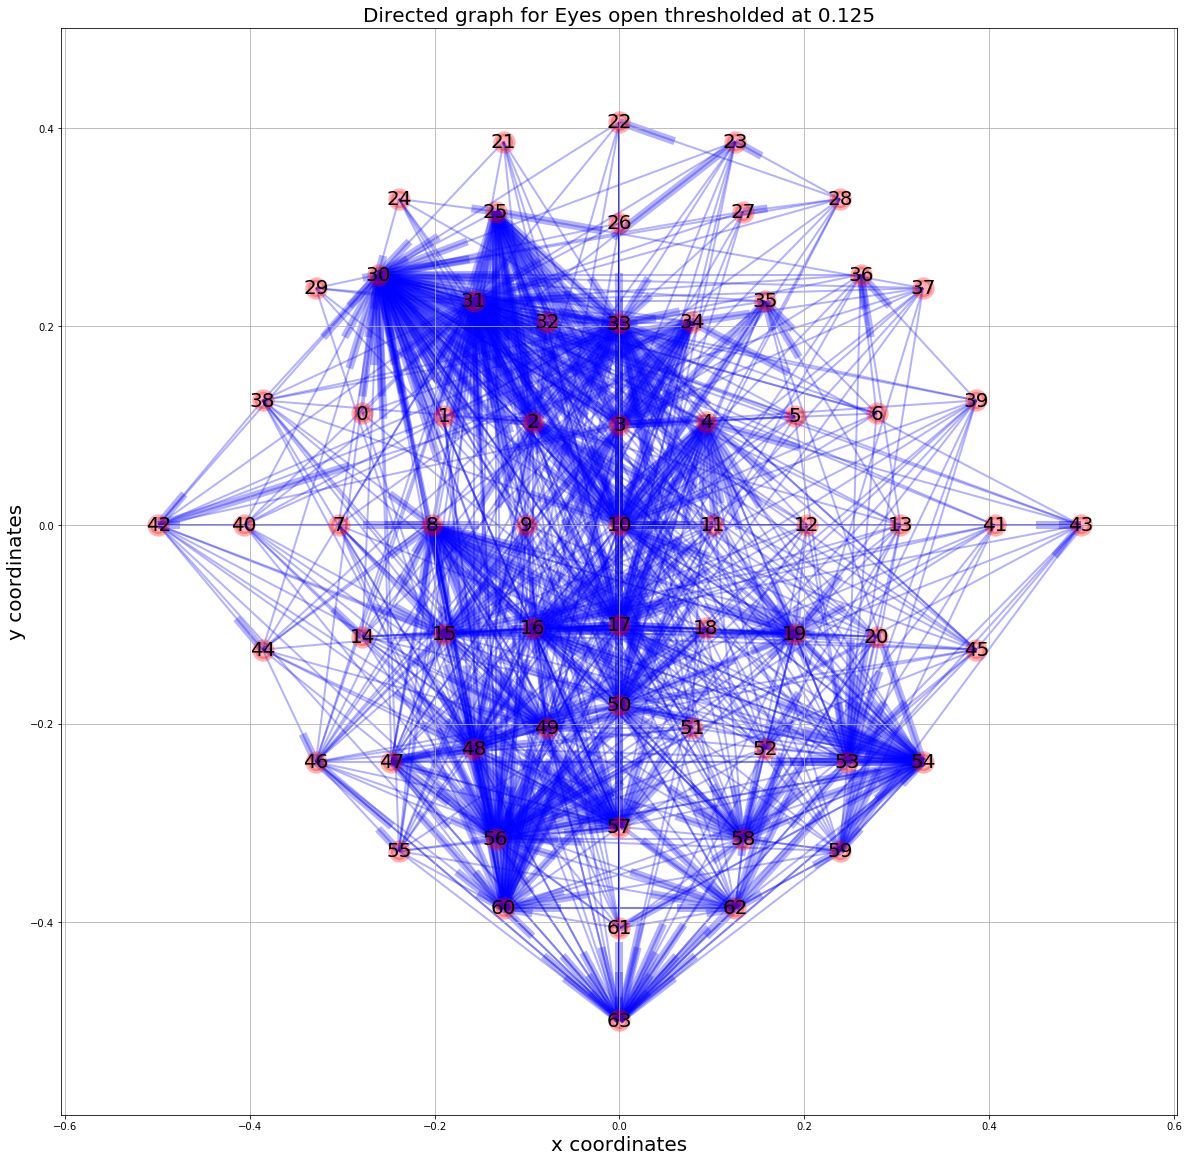

In [1372]:
def plot_graph(graph, pos, name="", flag=False):
    plt.figure(figsize=(20,20))
    nx.draw_networkx(graph, pos=pos, arrows=True, edge_color="blue", node_color="red", 
                      node_shape="o", font_size=20, alpha=0.3, linewidths =5, width=2)
    plt.grid()
    plt.xlabel('x coordinates', fontsize = 20)
    plt.ylabel('y coordinates', fontsize = 20)
    plt.title(name, fontsize=20)
    #plt.savefig('fig_5_threshgraph_ec.png')
    plt.show()
    
plot_graph(g_eo ,pos, 'Directed graph for Eyes open thresholded at 0.135')
plot_graph(g_ec ,pos, 'Directed graph for Eyes open thresholded at 0.125')

### 3.1 Compute binary global (clustering coefficient, path length) and local (degree, in/out-degree) graph indices. List the highest 10 channels for local indices.

In [835]:
def global_indices(graph):
    return nx.average_clustering(graph.to_undirected()),nx.average_shortest_path_length(graph.to_undirected())

def local_indices(graph):
    graph = graph.to_directed()
    indices = sorted(graph.out_degree(), key=lambda x : graph.out_degree()[x],reverse=True)[:10]
    out_degree_values = [graph.out_degree()[indices[i]] for i in range(len(indices)) ]
    
    indices_in = sorted(graph.in_degree(), key=lambda x : graph.in_degree()[x],reverse=True)[:10]
    in_degree_values = [graph.in_degree()[indices_in[i]] for i in range(len(indices_in)) ]
    
    indices_deg = sorted(graph.degree(), key=lambda x : graph.degree()[x],reverse=True)[:10]
    degree_values = [graph.degree()[indices_deg[i]] for i in range(len(indices_deg)) ]

    df_out = pd.DataFrame( data = {'channel name':np.array(signal_labels)[indices],'index_num':indices,'out_degree':out_degree_values} , index=np.arange(0,len(indices)))
    df_in = pd.DataFrame( data = {'channel name':np.array(signal_labels)[indices_in],'index_num':indices_in,'in_degree':in_degree_values} , index=np.arange(0,len(indices)))
    df_degree = pd.DataFrame( data = {'channel name':np.array(signal_labels)[indices_deg],'index_num':indices_deg,'degree':degree_values} , index=np.arange(0,len(indices)))
    return df_in,df_out,df_degree

### Global Characteristics 

In [848]:
print('Eyes open' + '\n')
print('Average clustering coefficient for eyes open: ',global_indices(g_eo)[0])
print('Path length for eyes open: ',global_indices(g_eo)[1] , '\n')


print('Eyes closed' + '\n')
print('Average clustering coefficient for eyes closed: ',global_indices(g_ec)[0])
print('Path length for eyes closed: ',global_indices(g_ec)[1])



Eyes open

Average clustering coefficient for eyes open:  0.7449459503420454
Path length for eyes open:  1.6577380952380953 

Eyes closed

Average clustering coefficient for eyes closed:  0.6942497643468042
Path length for eyes closed:  1.6612103174603174


### Local Characteristics

In [852]:
print('Eyes open' + '\n')
df_in_eo,df_out_eo,df_degree_eo = local_indices(g_eo)

print('Top 10 nodes with highest in_degree for eyes open' + '\n')
print(df_in_eo ,'\n')
print('Top 10 nodes with highest out_degree for eyes open'+ '\n')
print(df_out_eo , '\n')
print('Top 10 nodes with highest degree for eyes open'+ '\n')
print(df_degree_eo , '\n')



print('Eyes closed' + '\n')
df_in,df_out,df_degree = local_indices(g_ec)

print('Top 10 nodes with highest in_degree for eyes closed' + '\n')
print(df_in ,'\n')
print('Top 10 nodes with highest out_degree for eyes closed'+ '\n')
print(df_out , '\n')
print('Top 10 nodes with highest degree for eyes closed'+ '\n')
print(df_degree , '\n')

Eyes open

Top 10 nodes with highest in_degree for eyes open

  channel name  in_degree  index_num
0         F5..         64         30
1         F3..         64         31
2         F1..         56         32
3         Cp4.         54         19
4         Cp3.         53         15
5         Fz..         47         33
6         O2..         46         62
7         T9..         42         42
8         Po4.         40         58
9         P1..         38         49 

Top 10 nodes with highest out_degree for eyes open

  channel name  index_num  out_degree
0         Af8.         28          20
1         Fp2.         23          19
2         Ft8.         39          18
3         F6..         36          17
4         F8..         37          17
5         C2..         11          16
6         Fp1.         21          16
7         Af7.         24          16
8         Af4.         27          16
9         F4..         35          16 

Top 10 nodes with highest degree for eyes open

  channel

### Motif Analysis 

### 4.1 Perform motifs analysis to investigate the presence of 3-node configurations in the networks: determine their frequency and statistical significance (motifs, anti-motifs).

### Motif analysis using mfinder software

In [1336]:
#make text file for mfinder tool
def make_input_file(g,name):
    edge_list = []
    for edge in g.edges():
        edge_list.append([edge[0],edge[1],1])
    x=np.array(edge_list, dtype=np.int8)
    np.savetxt(name, x, fmt='%i', delimiter=' ')
    return edge_list

edge_list_eo = make_input_file(g_th_eo,'input_eo.txt')
edge_list_ec = make_input_file(g_th_ec,'input_ec.txt')

In [1337]:
motifs_eo = np.loadtxt("output_eo_MAT.txt")
motifs_ec = np.loadtxt("output_ec_MAT.txt")
motifs_ec = pd.DataFrame(motifs_ec,columns=['motif_id','freq','stat_significance','+-error','z_score','p_value','Uniq','Mili'])
motifs_eo = pd.DataFrame(motifs_eo,columns=['motif_id','freq','stat_significance','+-error','z_score','p_value','Uniq','Mili'])


### Over represented nodes or anti motifs are those nodes with pvalue < 0.05 
### under represented nodes or motifs are those nodes with pvalue > 0.05 

### Motifs


In [1338]:
#select all motifs having pvalue greater than 0.05 for both eyes open and eyes closed

print('Motifs/Under represented nodes for Eyes Open' ,'\n')
print(motifs_eo.loc[motifs_eo.p_value > 0.05].iloc[:,:6])
print('\n')
print('Motifs/Under represented nodes for Eyes closed','\n')
print(motifs_ec.loc[motifs_ec.p_value > 0.05].iloc[:,:6])

Motifs/Under represented nodes for Eyes Open 

    motif_id    freq  stat_significance  +-error  z_score  p_value
0        6.0   464.0           561.7850  30.2958  -3.2277     1.00
1       12.0   635.0           688.6550  23.2709  -2.3057     0.99
2       14.0    32.0            67.2067   7.9771  -4.4135     1.00
3       36.0  8264.0          8462.2450  34.8425  -5.6897     1.00
6       74.0  1343.0          1316.3933  27.1217   0.9810     0.16
7       78.0    25.0            54.2500   6.7170  -4.3546     1.00
8       98.0     4.0            11.5300   4.5609  -1.6510     0.99
9      102.0    62.0            89.6225   8.7139  -3.1699     1.00
10     108.0  1391.0          1398.7900  16.1785  -0.4815     0.71
11     110.0   161.0           160.7900  11.1440   0.0188     0.50


Motifs/Under represented nodes for Eyes closed 

    motif_id    freq  stat_significance  +-error  z_score  p_value
0        6.0   550.0           654.0950  24.7139  -4.2120     1.00
1       12.0  1337.0          1

### Anti Motifs

In [1339]:
#select all motifs having pvalue less than 0.05 for both eyes open and eyes closed

print('Anti Motifs/Over represented nodes for Eyes Open' ,'\n')
print(motifs_eo.loc[motifs_eo.p_value < 0.05].iloc[:,:6])
print('\n')
print('Anti Motifs/Over represented nodes for Eyes closed','\n')
print(motifs_ec.loc[motifs_ec.p_value < 0.05].iloc[:,:6])

Anti Motifs/Over represented nodes for Eyes Open 

    motif_id    freq  stat_significance  +-error  z_score  p_value
4       38.0  1541.0          1468.8867  32.3666   2.2280     0.02
5       46.0    79.0            48.0950   5.4700   5.6499     0.00
12     238.0    91.0            81.3200   3.4667   2.7923     0.01


Anti Motifs/Over represented nodes for Eyes closed 

    motif_id   freq  stat_significance  +-error  z_score  p_value
5       46.0  210.0           176.5475   7.9353   4.2156     0.00
10     108.0  867.0           792.8350  13.7835   5.3807     0.00
12     238.0   54.0            47.4633   3.5483   1.8422     0.03


### Community Detection

### 5.1 Determine number and composition (i.e. list of nodes) of the communities obtained applying one of the algorithms introduced​ during the course.

In [1340]:
#thresholed graphs g_eo,g_ec
# community.best_partition of networkx works on louvain 

#import community
#partition_eo = community.best_partition(g_eo.to_undirected())
#partition_ec = community.best_partition(g_ec.to_undirected())

def output_dct(partition):
    
    dct = {}
    for i in partition.values():
        for j in partition.keys():
            if partition[j] == i:
                if i in dct.keys():
                    dct[i].update([j])
                else:
                    dct[i] = {j}
    return dct

#Display results
print('Communities for State eyes open','\n')
for i in output_dct(partition_eo).keys():
    print('Community_id',i,' ','Members',output_dct(partition_eo)[i])
    
print('\n')
    
print('Communities for State eyes closed','\n')
for i in output_dct(partition_ec).keys():
    print('Community_id',i,' ','Members',output_dct(partition_ec)[i]) 

Communities for State eyes open 

Community_id 0   Members {0, 5, 38, 40, 47, 31}
Community_id 1   Members {1, 2, 4, 6, 10, 15, 17, 21, 22, 23, 24, 25, 26, 27, 28, 29, 34, 35, 36, 37, 39, 42, 60, 62, 63}
Community_id 2   Members {3, 7, 8, 9, 11, 14, 16, 18, 30, 32, 33, 44, 46, 48, 49, 50, 51, 55, 56, 57, 59, 61}
Community_id 3   Members {41, 43, 12, 13, 45, 19, 20, 52, 53, 54, 58}


Communities for State eyes closed 

Community_id 0   Members {0, 1, 3, 5, 6, 10, 17, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 39}
Community_id 1   Members {2, 4, 41, 43, 12, 13, 45, 16, 19, 20, 52, 53, 56, 58}
Community_id 2   Members {34, 38, 7, 40, 42, 44, 14, 15, 48, 49, 57}
Community_id 3   Members {8, 46, 47, 51, 54, 55, 25, 59, 60, 61, 62, 63}
Community_id 4   Members {9, 18, 11, 50}


### Visualize communities

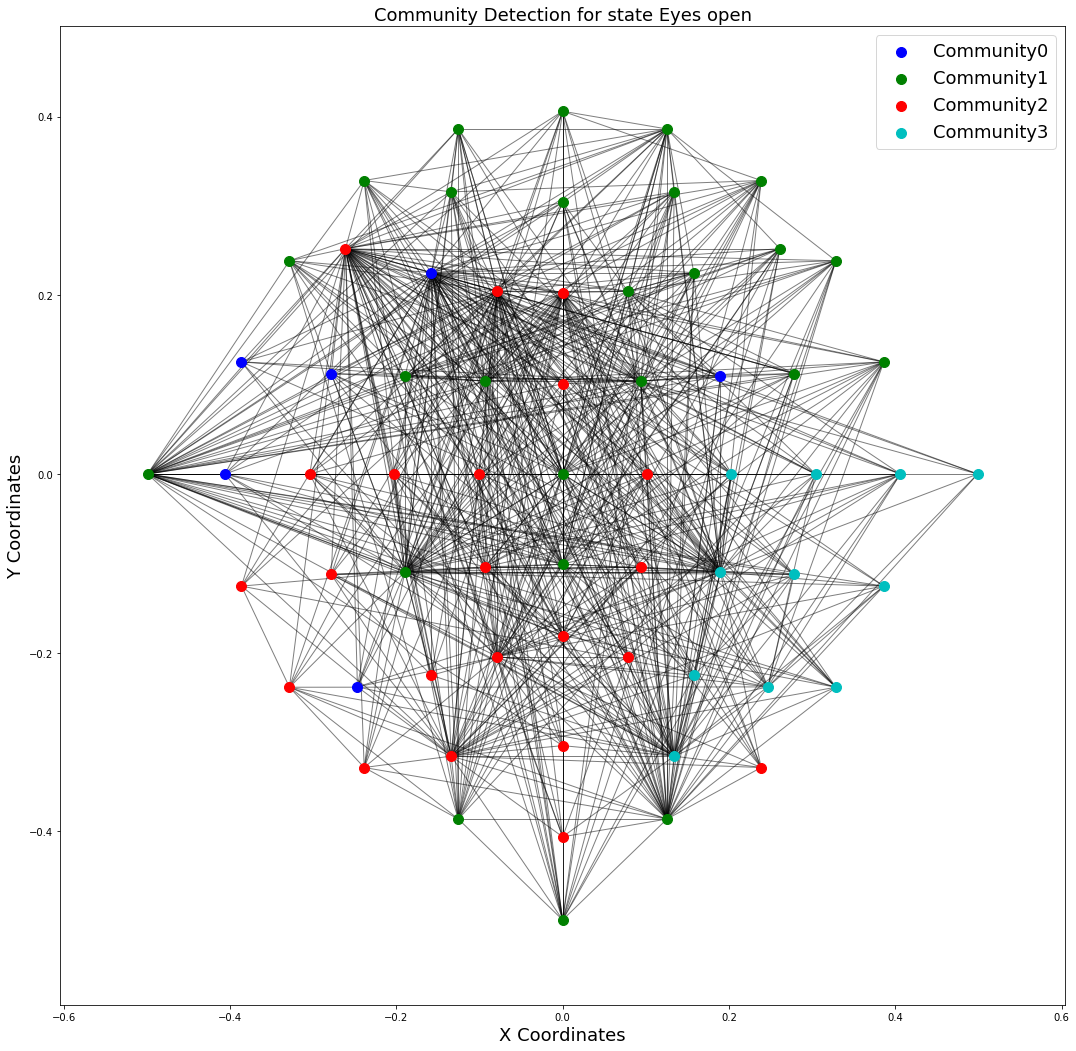

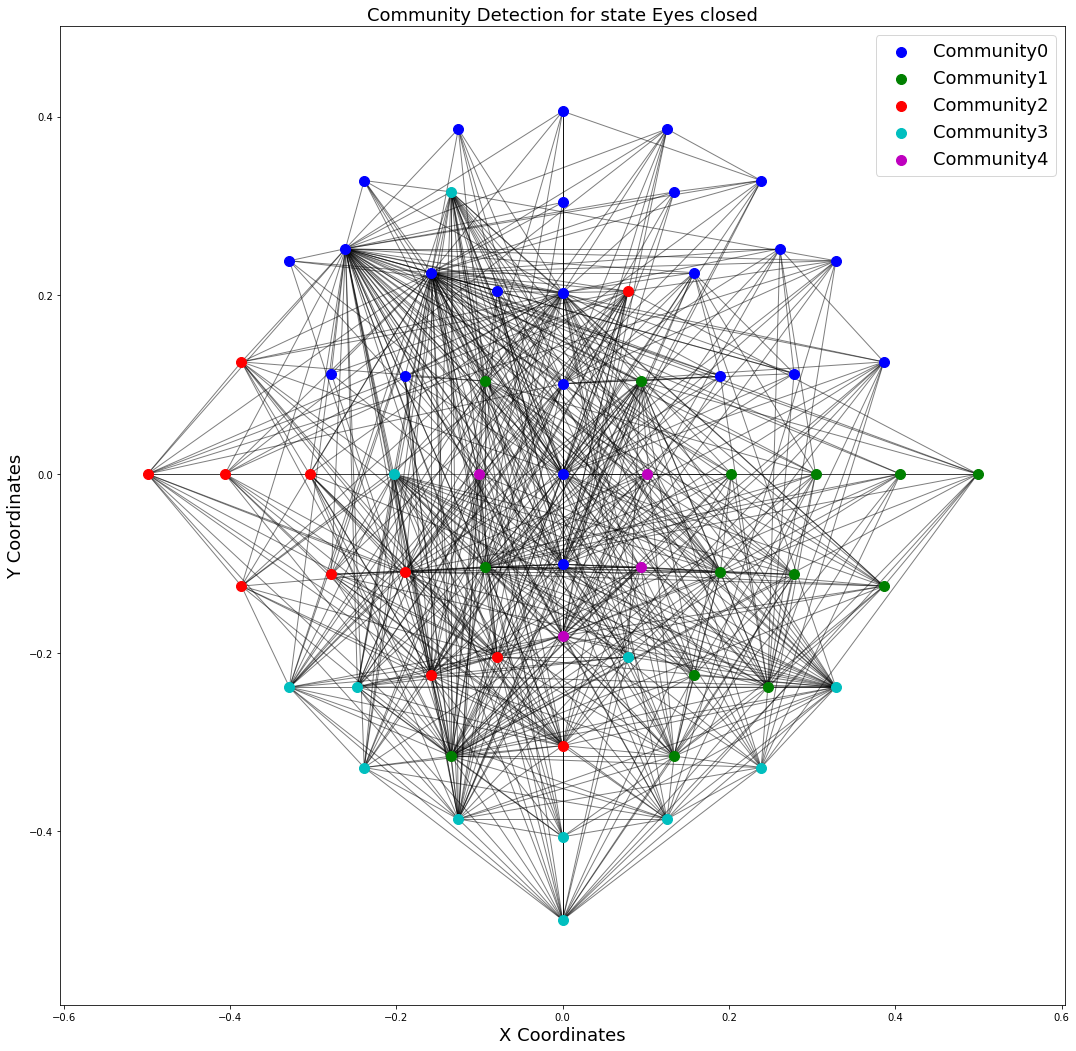

In [1375]:
def visualize(g,partition,pos,name,list_legend):

    plt.figure(figsize=(18,18))
    colors = 'bgrcmykw'
    
    for i, com in enumerate(set(partition.values())):
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
        
        nx.draw_networkx_nodes(g.to_undirected(), pos, list_nodes,
                                node_size=100, node_color=colors[i])

    nx.draw_networkx_edges(g.to_undirected(), pos, alpha=0.5)
    plt.xlabel('X Coordinates',fontsize = 18)
    plt.ylabel('Y Coordinates',fontsize = 18)
    plt.legend(list_legend,fontsize = 18)
    plt.title(name,fontsize = 18)
    #plt.savefig('fig_12_community.png')
    plt.show()

#eyes open
visualize(g_eo,partition_eo,pos,'Community Detection for state Eyes open',['Community'+str(i) for i in range(4)])

#eyes closed
visualize(g_ec,partition_ec,pos,'Community Detection for state Eyes closed',['Community'+str(i) for i in range(5)])